## Imports and environment setup

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [51]:
from utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [50]:
DATA_PATH= Path('data/')
TRAIN_PATH=DATA_PATH/'train/'
TMP_PATH=DATA_PATH/'tmp/'
list(DATA_PATH.iterdir())

[PosixPath('data/challenge-2018-class-descriptions-500.csv'),
 PosixPath('data/challenge-2018-image-ids-valset-od.csv'),
 PosixPath('data/validation'),
 PosixPath('data/tmp'),
 PosixPath('data/challenge-2018-train-annotations-human-imagelabels.csv'),
 PosixPath('data/bbox_labels_500_hierarchy.json'),
 PosixPath('data/challenge2018_test'),
 PosixPath('data/train'),
 PosixPath('data/challenge-2018-train-annotations-bbox.csv'),
 PosixPath('data/train-images-boxable-with-rotation.csv')]

## Exploring the data

### Train images and filenames

In [11]:
train_image_ids = pd.read_csv(DATA_PATH/'train-images-boxable-with-rotation.csv')
print(train_image_ids.shape)
train_image_ids.head()

(1743042, 12)


,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [13]:
print(f'total no of rows in the above dataframe: {train_image_ids.shape[0]}')
print(f'Total no of unique images is {train_image_ids.ImageID.nunique()}')
print(f'No of unique Subsets is {train_image_ids.Subset.nunique()}')
print(f'No of labels by Rotation : ')
for i,v in train_image_ids.Rotation.value_counts().items():
    print(f'\t{i} : {v}')

total no of rows in the above dataframe: 1743042
Total no of unique images is 1743042
No of unique Subsets is 1
No of labels by ROtation : 
	0.0 : 1478844
	270.0 : 10601
	90.0 : 5296
	180.0 : 1031


### Bounding boxes and image-level labels

In [14]:
image_level_labels = pd.read_csv(DATA_PATH/'challenge-2018-train-annotations-human-imagelabels.csv')
print(image_level_labels.shape)
image_level_labels.head()

(5743460, 4)


,ImageID,Source,LabelName,Confidence
0,79f4fdf91ab44345,verification,/m/01mqdt,1
1,39f88921c49c1ff8,verification,/m/02wbtzl,1
2,0b605798b08c1124,verification,/m/0jyfg,1
3,37f76516e5753fa4,verification,/m/0hg7b,0
4,9bb59e22352594e9,verification,/m/01226z,1


In [15]:
print(f'total no of rows in the above dataframe: {image_level_labels.shape[0]}')
print(f'Total no of unique images is {image_level_labels.ImageID.nunique()}')
print(f'No of unique labels is {image_level_labels.LabelName.nunique()}')
print(f'No of labels by confidence : ')
for i,v in image_level_labels.Confidence.value_counts().items():
    print(f'\t{i} : {v}')
print(f'No of labels by source : ')
for i,v in image_level_labels.Source.value_counts().items():
    print(f'\t{i} : {v}')

total no of rows in the above dataframe: 5743460
Total no of unique images is 1717554
No of unique labels is 500
No of labels by confidence : 
	1 : 3830005
	0 : 1913455
No of labels by source : 
	verification : 5564816
	crowdsource-verification : 178644


Around 25,000 images doesn't even have atleast one image level labels. Need to remove them from the validation set as well as think on any tricks needed to train these images.

In [16]:
bbox_annotations = pd.read_csv(DATA_PATH/'challenge-2018-train-annotations-bbox.csv')
print(bbox_annotations.shape)
bbox_annotations.head()

(12195144, 13)


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,8d6dec80235b6fea,xclick,/m/09j5n,1,0.760000,0.778125,0.645892,0.673277,0,0,0,0,0
1,8d6dec80235b6fea,xclick,/m/09j5n,1,0.817500,0.831875,0.628895,0.661945,0,0,0,0,0
2,8d6dec80235b6fea,xclick,/m/09j5n,1,0.843125,0.870000,0.619452,0.645892,0,0,0,0,0
3,8d6dec80235b6fea,xclick,/m/09j5n,1,0.867500,0.891875,0.597734,0.625118,0,0,0,0,0
4,8d6dec80235b6fea,xclick,/m/09j5n,1,0.895625,0.911250,0.625118,0.656280,0,0,0,0,0


In [104]:
print(f'No of bbox annotations is {bbox_annotations.shape[0]}')
print(f'Total no of unique images is {bbox_annotations.ImageID.nunique()}')
print(f'No of bbox by Source : ')
for i,v in bbox_annotations.Source.value_counts().items():
    print(f'\t{i} : {v}')
print(f'No of bbox by Confidence : ')
for i,v in bbox_annotations.Confidence.value_counts().items():
    print(f'\t{i} : {v}')
print(f'No of bbox by IsOccluded : ')
for i,v in bbox_annotations.IsOccluded.value_counts().items():
    print(f'\t{i} : {v}')
print(f'No of bbox by IsTruncated : ')
for i,v in bbox_annotations.IsTruncated.value_counts().items():
    print(f'\t{i} : {v}')
print(f'No of bbox by IsGroupOf : ')
for i,v in bbox_annotations.IsGroupOf.value_counts().items():
    print(f'\t{i} : {v}')
print(f'No of bbox by IsDepiction : ')
for i,v in bbox_annotations.IsDepiction.value_counts().items():
    print(f'\t{i} : {v}')
print(f'No of bbox by IsInside : ')
for i,v in bbox_annotations.IsInside.value_counts().items():
    print(f'\t{i} : {v}')

No of bbox annotations is 12195144
Total no of unique images is 1674979
No of bbox by Source : 
	xclick : 10889331
	activemil : 1305813
No of bbox by Confidence : 
	1 : 12195144
No of bbox by IsOccluded : 
	1 : 8138747
	0 : 4037015
	-1 : 19382
No of bbox by IsTruncated : 
	0 : 9171299
	1 : 3004463
	-1 : 19382
No of bbox by IsGroupOf : 
	0 : 11501347
	1 : 674415
	-1 : 19382
No of bbox by IsDepiction : 
	0 : 11518289
	1 : 657473
	-1 : 19382
No of bbox by IsInside : 
	0 : 12140929
	1 : 34833
	-1 : 19382


### Class labels and heirarchy

In this problem, classes are organized herirachically , hence the scoring depends on all the parent classes as well

In [23]:
classes_metadata = pd.read_csv(DATA_PATH/'challenge-2018-class-descriptions-500.csv' , header=None, names=['class_id', 'class_name'])
print(classes_metadata.shape)
classes_metadata.head()

(500, 2)


,class_id,class_name
0,/m/061hd_,Infant bed
1,/m/06m11,Rose
2,/m/03120,Flag
3,/m/01kb5b,Flashlight
4,/m/0120dh,Sea turtle


In [26]:
# https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html
# https://storage.googleapis.com/openimages/challenge_2018/bbox_labels_500_hierarchy.json
with open(DATA_PATH/'bbox_labels_500_hierarchy.json') as f:
    class_heirarchy = json.load(f)

### Consolidating the data for each image

In [78]:
class2ids = {c:i for i,c in enumerate(classes_metadata.class_id)}
ids2class = {i:c for c,i in class2ids.items()}
class2name = pd.Series(classes_metadata.class_name.values, index=classes_metadata.class_id).to_dict()

In [79]:
save_obj(class2ids, TMP_PATH/'class_to_ids.pkl')
save_obj(ids2class, TMP_PATH/'ids_to_class.pkl')
save_obj(class2name, TMP_PATH/'class_to_name.pkl')

In [80]:
class2ids = load_obj(TMP_PATH/'class_to_ids.pkl')
ids2class = load_obj(TMP_PATH/'ids_to_class.pkl')
class2name = load_obj(TMP_PATH/'class_to_name.pkl')

In [122]:
train_img_anno = pd.DataFrame(columns=['ImageId', 'Bbox', 'Labels'])
train_img_anno.ImageId = train_image_ids.ImageID
train_img_anno.head()
    

,ImageId,Bbox,Labels
0,4fa8054781a4c382,NaN,NaN
1,b37f763ae67d0888,NaN,NaN
2,7e8584b0f487cb9e,NaN,NaN
3,86638230febe21c4,NaN,NaN
4,249086e72671397d,NaN,NaN


In [126]:
bbox = bbox_annotations[['ImageID','LabelName','XMin','XMax','YMin','YMax']]
bbox['Label'] = bbox['LabelName'].apply(lambda x: class2ids[x])
bbox['bb'] = bbox[['Label','XMin', 'YMin', 'XMax', 'YMax']].values.tolist()
bbox = bbox.drop(['LabelName','XMin', 'YMin', 'XMax', 'YMax', 'Label'], axis=1)
bbox.head()

/home/manoj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/manoj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ImageID,bb
0,8d6dec80235b6fea,"[70.0, 0.76, 0.645892, 0.778125, 0.673277]"
1,8d6dec80235b6fea,"[70.0, 0.8175, 0.628895, 0.831875, 0.661945]"
2,8d6dec80235b6fea,"[70.0, 0.843125, 0.619452, 0.87, 0.645892]"
3,8d6dec80235b6fea,"[70.0, 0.8675, 0.597734, 0.891875, 0.625118000..."
4,8d6dec80235b6fea,"[70.0, 0.895625, 0.6251180000000001, 0.91125, ..."


In [127]:
x = bbox.groupby(by='ImageID')['bb'].apply(list)

In [137]:
image_bbox = x.to_frame().reset_index()

In [140]:
print(image_bbox.shape)
image_bbox.head()

(1674979, 2)


,ImageID,bb
0,000002b66c9c498e,"[[338.0, 0.0125, 0.14843800000000001, 0.195311..."
1,000002b97e5471a0,"[[43.0, 0.0, 0.9033329999999999, 0.05440900000..."
2,000002c707c9895e,"[[164.0, 0.053085, 0.319846, 0.464848999999999..."
3,0000048549557964,"[[43.0, 0.0, 0.164167, 0.250625, 0.765], [43.0..."
4,000004f4400f6ec5,"[[492.0, 0.4775, 0.399627, 0.496875, 0.441643]..."


In [142]:
train_ids = train_image_ids[['ImageID']]
print(train_ids.shape)
train_ids.head()

(1743042, 1)


,ImageID
0,4fa8054781a4c382
1,b37f763ae67d0888
2,7e8584b0f487cb9e
3,86638230febe21c4
4,249086e72671397d


In [143]:
train_csv = train_ids.merge(image_bbox, how='inner', on='ImageID')
print(train_csv.shape)
train_csv.head()

(1674979, 2)


,ImageID,bb
0,4fa8054781a4c382,"[[338.0, 0.388125, 0.355, 0.473125, 0.631667],..."
1,b37f763ae67d0888,"[[113.0, 0.188281, 0.297917, 0.320312, 0.81875..."
2,7e8584b0f487cb9e,"[[164.0, 0.15015599999999998, 0.275625, 0.5380..."
3,86638230febe21c4,"[[240.0, 0.603333, 0.21375, 0.970833, 0.574375..."
4,249086e72671397d,"[[338.0, 0.630625, 0.699029, 0.695625, 0.90114..."


In [146]:
train_csv.to_csv(TMP_PATH/'train_images_bbox.csv', index=False)

In [147]:
train_data = pd.read_csv(TMP_PATH/'train_images_bbox.csv')
print(train_data.shape)
train_data.head()

(1674979, 2)


,ImageID,bb
0,4fa8054781a4c382,"[[338.0, 0.388125, 0.355, 0.473125, 0.631667],..."
1,b37f763ae67d0888,"[[113.0, 0.188281, 0.297917, 0.320312, 0.81875..."
2,7e8584b0f487cb9e,"[[164.0, 0.15015599999999998, 0.275625, 0.5380..."
3,86638230febe21c4,"[[240.0, 0.603333, 0.21375, 0.970833, 0.574375..."
4,249086e72671397d,"[[338.0, 0.630625, 0.699029, 0.695625, 0.90114..."


### Visualizing the data

In [180]:
train_data = train_data.set_index('ImageID')
train_data.head()

,bb
ImageID,
4fa8054781a4c382,"[[338.0, 0.388125, 0.355, 0.473125, 0.631667],..."
b37f763ae67d0888,"[[113.0, 0.188281, 0.297917, 0.320312, 0.81875..."
7e8584b0f487cb9e,"[[164.0, 0.15015599999999998, 0.275625, 0.5380..."
86638230febe21c4,"[[240.0, 0.603333, 0.21375, 0.970833, 0.574375..."
249086e72671397d,"[[338.0, 0.630625, 0.699029, 0.695625, 0.90114..."


In [196]:
def show_with_bbox(imId):
    img = open_image(TRAIN_PATH/f'{imId}.jpg')
    ax = multi_od_image(img, ast.literal_eval(train_data.loc[imId].bb), ids2class, class2name)

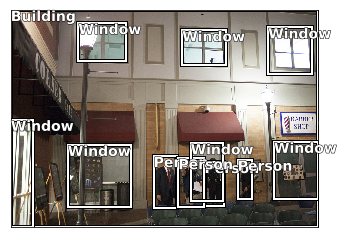

In [197]:
show_with_bbox('249086e72671397d')